In [1]:
using Oceananigans
using Oceananigans.Units: minutes, hours, hour, days
using CairoMakie
using Measures

In [3]:
grid = RectilinearGrid(size=128, z=(-0.5,0.5), topology=(Flat, Flat, Bounded)) 
# default is periodic, periodic, bounded, flat assigned since 1-D

1×1×128 RectilinearGrid{Float64, Flat, Flat, Bounded} on CPU with 0×0×3 halo
├── Flat x
├── Flat y
└── Bounded  z ∈ [-0.5, 0.5]      regularly spaced with Δz=0.0078125

In [6]:
# models either molecular or turbulent diffusion
closure = ScalarDiffusivity(κ=1)
# ScalarDiffusivity{ExplicitTimeDiscretization}(ν=0.0, κ=1.0)

ScalarDiffusivity{ExplicitTimeDiscretization}(ν=0.0, κ=1.0)

In [7]:
# Model
model = NonhydrostaticModel(; grid, closure, tracers=:T) # data is model.tracers.T was initialized to 0's

NonhydrostaticModel{CPU, RectilinearGrid}(time = 0 seconds, iteration = 0)
├── grid: 1×1×128 RectilinearGrid{Float64, Flat, Flat, Bounded} on CPU with 0×0×3 halo
├── timestepper: QuasiAdamsBashforth2TimeStepper
├── tracers: T
├── closure: ScalarDiffusivity{ExplicitTimeDiscretization}(ν=0.0, κ=(T=1.0,))
├── buoyancy: Nothing
└── coriolis: Nothing

In [8]:
width = 0.1
initial_temperature(x, y, z) = exp(-z^2 / (2width^2))
set!(model, T=initial_temperature) # the set! call modifies the data in model.tracers.T

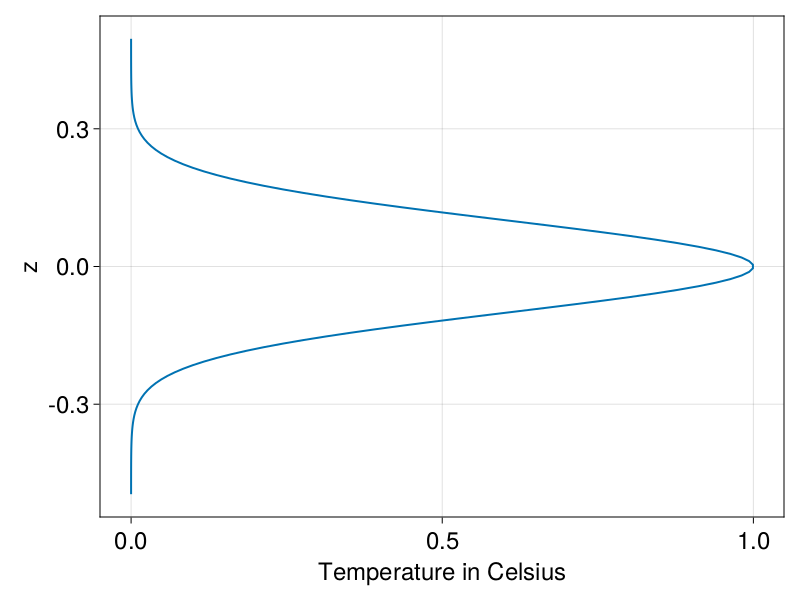

In [13]:
# Visualization
set_theme!(Theme(fontsize = 24, linewidth=2))
fig = Figure()
axis = (xlabel = "Temperature in Celsius", ylabel = "z")
label = "t = 0"
z = znodes(model.tracers.T)
T = interior(model.tracers.T, 1, 1, :)
 
lines(T, z; label, axis)